Immigration to Canada from Eastern Europe during 1980 - 2013

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
#also needed: openpyxl (install by pip)

In [2]:
from dataset import *

                    Continent          Region  1980  1981  1982  1983  1984  \
Country                                                                       
Poland                 Europe  Eastern Europe   863  2930  5881  4546  3588   
Romania                Europe  Eastern Europe   375   438   583   543   524   
Russian Federation     Europe  Eastern Europe     0     0     0     0     0   
Ukraine                Europe  Eastern Europe     0     0     0     0     0   
Bulgaria               Europe  Eastern Europe    24    20    12    33    11   
Hungary                Europe  Eastern Europe   205   310   397   337   310   
Republic of Moldova    Europe  Eastern Europe     0     0     0     0     0   
Belarus                Europe  Eastern Europe     0     0     0     0     0   
Slovakia               Europe  Eastern Europe     0     0     0     0     0   
Czech Republic         Europe  Eastern Europe     0     0     0     0     0   

                     1985  1986  1987  ...  2005  2

c:\Users\krzys\Desktop\venv\Projekty\01-Immigration_CA\dataset.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset['Total'] = dataset.sum(axis=1)


Modify data

In [33]:
df_pop = pd.DataFrame(datasetEE[years].sum(axis=0))  # total population per year

df_pop.index = map(int, df_pop.index)  # needed for regression

df_pop.reset_index(inplace=True)  # we need years back as a column rather than index

df_pop.columns = ['year', 'total']

df_pop.head()

,year,total
0,1980,1467
1,1981,3698
2,1982,6873
3,1983,5459
4,1984,4433


Analysis

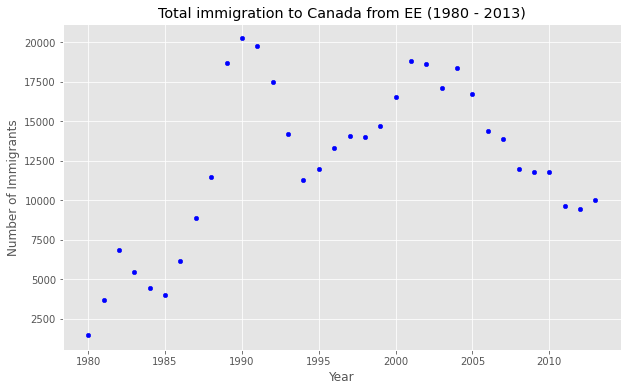

In [4]:
df_pop.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='blue')

plt.title('Total immigration to Canada from EE (1980 - 2013)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Immigration from Poland for 2000 - 2010

In [54]:
years_cut = list(map(str, range(2000, 2010)))  

df_pol = datasetEE.loc['Poland', years_cut]

df_pol = pd.DataFrame(df_pol)
df_pol.reset_index(inplace=True)
df_pol.columns = ['year', 'total']

df_pol['year'] = df_pol['year'].astype('int64')  # required for regression
df_pol['total'] = df_pol['total'].astype('int64')

fit: [-4.87333333e+01  9.90488667e+04]


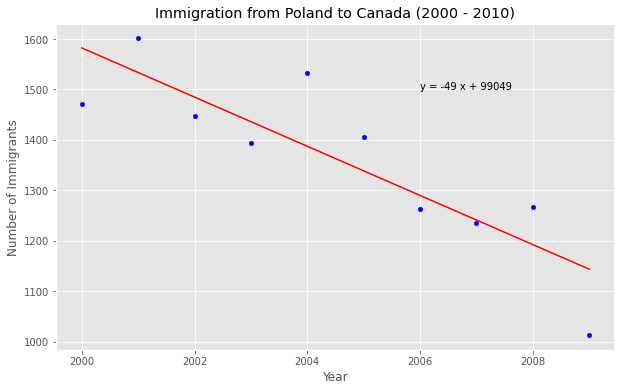

In [67]:
x = df_pol['year']
y = df_pol['total']

fit = np.polyfit(x, y, deg=1)

print('fit:', fit)

df_pol.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='blue')

plt.title('Immigration from Poland to Canada (2000 - 2010)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y = {0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2006, 1500))

plt.show()

In [71]:
# Estimation of no. immigrants: -49 * 2011 + 99049 = 510
# Actual data: 720
# Difference: 210

df_pol_2 = datasetEE.loc['Poland', '2011']
df_pol_2

720